# plotters (BitMapBackend)をjupyter上で使う

plottersのevcxrを使うと、バックエンドがSVGになってしまう。
ここでは、画像表示をimage/evcxr_imageを使い、plottersからはバッファへの書き込みだけをさせてみる。

In [2]:
:dep image = "0.23"
:dep evcxr_image = "1.1"
:dep plotters = "0.3.1"
:dep plotters-bitmap = "0.3.1"

In [3]:
use evcxr_image::ImageDisplay;
use image::{GenericImage, GenericImageView, RgbImage, imageops::FilterType};

extern crate plotters;
use plotters::prelude::*;
use plotters::style::RGBAColor;
use plotters_bitmap::bitmap_pixel::RGBPixel;

## プロットする二次関数データ

In [4]:
let x: Vec<i32> = (0..10).collect();
let y: Vec<f32> = x.iter().map(|x| (x*x) as f32).collect();
let points: Vec<_> = x.iter().zip(y.iter()).map(|(&v0, &v1)| (v0 as f32, v1 as f32)).collect();

### 基本的なプロット

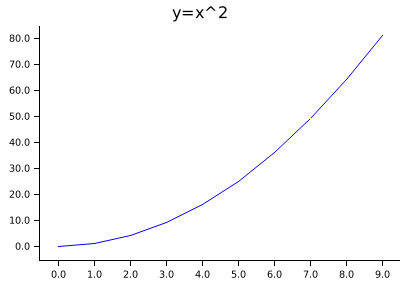

In [6]:
// なぜかevcxr_imageの一回目の画像表示は失敗する
// ImageBufferの数値が表示されてしまった場合、再度セルを実行すると画像が表示されるかもしれない。

let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    // 白背景の描画領域を作る
    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);

    // プロット領域を作る
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    // tickやgridの調整
    chart.configure_mesh()
        .disable_mesh()  // grid(False)
        .draw()?;        // draw ticks
    
    // curve 1
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
}
canvas

### グリッド

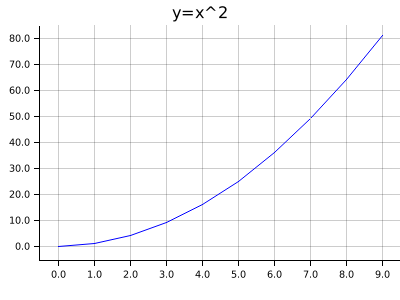

In [7]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);
    
    // プロット領域を作る
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(&TRANSPARENT)  // minor tickを消す
        .draw()?;        // draw ticks

    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
}
canvas

### 丸いマーカー

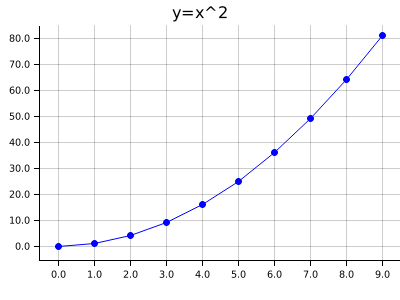

In [8]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);
    
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(&TRANSPARENT)  // minor tickを消す
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
}
canvas

### 四角のマーカー
注意：いい感じに四角のマーカーを作ってくれる関数はなさそう？

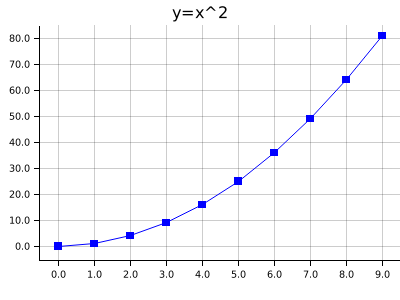

In [9]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);

    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(&TRANSPARENT)  // minor tickを消す
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
    
    // squareのマーカーをうまく設定する方法はない？
    chart.draw_series(points.iter().map(|v|
        Rectangle::new(
            [(v.0 - 0.1, v.1 - 1.3), (v.0 + 0.1, v.1 + 1.3)],
            BLUE.filled()
        )
    ));  
}
canvas

### XY labels
注意：X/Y座標ではtickとlabelのフォントが共有されている様子。

`x_label_style(style)`を使うと両方変更されてしまいます。

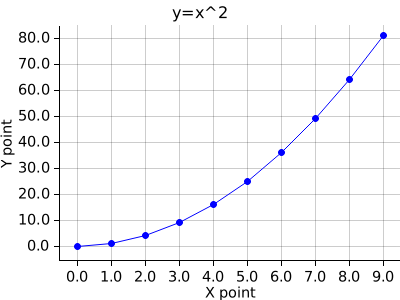

In [10]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);

    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(60)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(&TRANSPARENT)  // minor tickを消す
        .x_desc("X point")
        .x_label_style(("Arial", 18).into_font())
        .y_desc("Y point")
        .y_label_style(("Arial", 18).into_font())
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
}
canvas

### Bold line

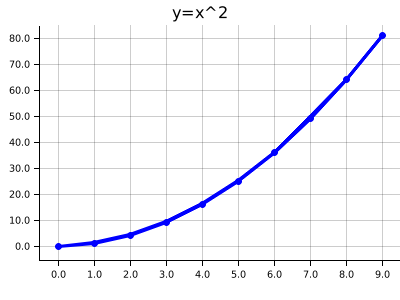

In [11]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);
    
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    chart.configure_mesh()
        .light_line_style(&TRANSPARENT)  // minor tickを消す
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            BLUE.stroke_width(3))
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
}
canvas

### X log scale
注意：左端の点をいい感じに扱ってくれず、軸座標内の数字に丸めてしまう様子。

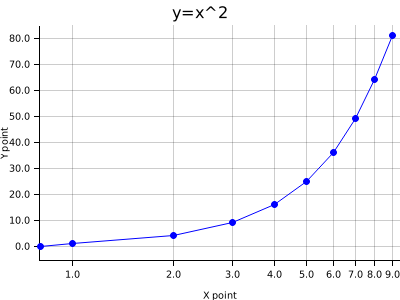

In [12]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);

    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(
            (0.8f32..9.5f32)  // 対数軸でマイナスの値があると無視される？
            .log_scale(),
            // .with_key_points(vec![1f32, 10f32]),
            (-5f32..85f32)
            )?;
    
    chart.configure_mesh()
        .light_line_style(&TRANSPARENT)  // minor tickを消す
        .x_desc("X point")
        .y_desc("Y point")
        .draw()?;        // draw ticks
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| (v.0, v.1) ),
            &BLUE)
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
}
canvas

### Line colors

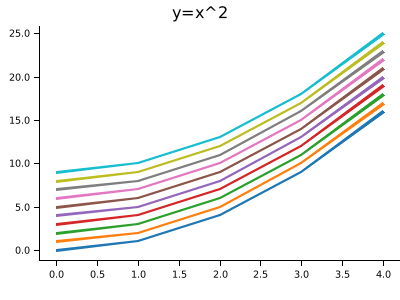

In [13]:
// matplotlibのデフォルトカラー
// see https://matplotlib.org/stable/users/dflt_style_changes.html
let colors = [
    RGBColor(0x1f, 0x77, 0xb4),
    RGBColor(0xff, 0x7f, 0x0e),
    RGBColor(0x2c, 0xa0, 0x2c),
    RGBColor(0xd6, 0x27, 0x28),
    RGBColor(0x94, 0x67, 0xbd),
    RGBColor(0x8c, 0x56, 0x4b),
    RGBColor(0xe3, 0x77, 0xc2),
    RGBColor(0x7f, 0x7f, 0x7f),
    RGBColor(0xbc, 0xbd, 0x22),
    RGBColor(0x17, 0xbe, 0xcf),
];

let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    // 白背景の描画領域を作る
    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);

    // プロット領域を作る
    let mut chart = ChartBuilder::on(&root)
        .caption("y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.2f32..4.2f32, -1f32..26f32)?;
    
    // tickやgridの調整
    chart.configure_mesh()
        .disable_mesh()  // grid(False)
        .draw()?;        // draw ticks
    
    // curve 1
    for (idx, color) in colors.iter().enumerate() {
        chart.draw_series(
            LineSeries::new(
                points.iter().take(5).map(|v| (v.0, v.1 + idx as f32)),
                colors[idx].stroke_width(2))
        )?;
    }
}
canvas

## imshow関連
### オリジナル画像

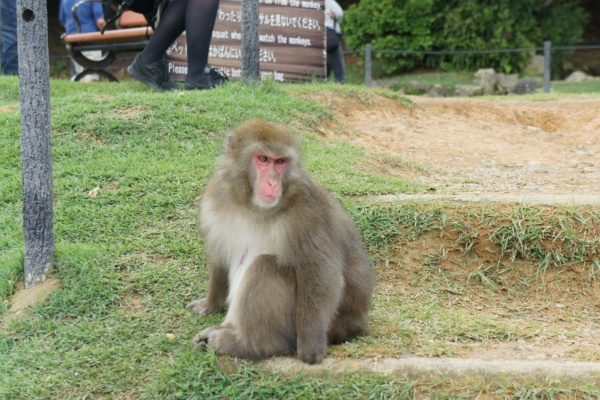

In [14]:
let img = image::open("macaque.jpg")?;
img.to_rgb8()

### imshow
注意：表示領域のピクセル数を取得して、明示的に画像をリサイズしてdrawing_areaに書き込む必要がある。

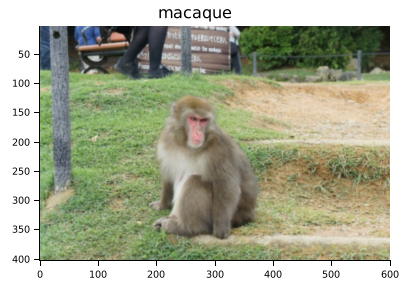

In [15]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE)?;
    
    // 右端のtickが切れてしまうのを避けるためにマージンを作っておく
    let root = root.margin(0, 0, 0, 10);
    
    let (width, height) = img.dimensions();
    
    // floatのtickでy方向を逆にするとなぜか処理が終わらない。
    let mut chart = ChartBuilder::on(&root)
        .caption("macaque", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(0..width, height..0)?;
    
    // plot areaのピクセル数を取得する
    let (w, h) = chart.plotting_area().dim_in_pixel();
    let small = img.resize_exact(w, h, FilterType::Gaussian);

    // 描画 - 左上の座標を指定する。
    let elem: BitMapElement<_> = ((0, 0), small).into(); // or
    // let elem = BitMapElement::<_>::from(((0.0f32, 80.0f32), img));
    chart.draw_series(std::iter::once(elem))?;
    
    chart.configure_mesh()
        .disable_mesh()
        .draw()?;        // draw ticks
}
canvas

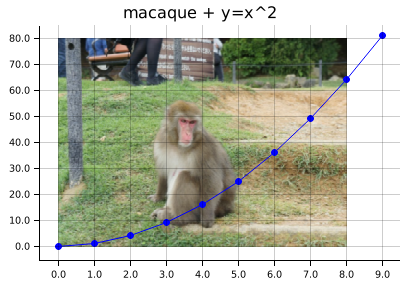

In [16]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE);

    let mut chart = ChartBuilder::on(&root)
        .caption("macaque + y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(-0.5f32..9.5f32, -5f32..85f32)?;
    
    // x:0-8, y:0-80の範囲で描画させる。
    // BitMapElementを使えばもう少しましになるはずだが、
    // ipynb環境ではsvgしか使えず、BitMapElementもなぜか使えないため、
    // 各ピクセルの長方形を作ってmatrixを表示させるように描画している。
    let (w, h) = (300, 300); // 後段の処理が遅いので縮小しておく
    let img = img
        .resize_exact(w, h, FilterType::Gaussian)
        .to_rgb8();
    
    // chartの座標軸上での画素サイズ
    let dx = 8f32 / w as f32;
    let dy = 80f32 / h as f32;
   
    chart.draw_series(
         (0..img.height() * img.width())
        .map(|i| {
            let y = i / w;
            let x = i % w; 
            let pixel = img.get_pixel(x, (h-1) - y);
            let lu = (dx * x as f32, dy * y as f32);
            let rb = (dx * (x+1) as f32, dy * (y+1) as f32);
            let color = RGBColor(pixel.0[0], pixel.0[1], pixel.0[2]);
            Rectangle::new([lu, rb], color.filled())
            })
        );
      
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| v.clone() ),
            &BLUE)
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            (v.0, v.1),
            3,
            BLUE.filled()
        )
    ));
    
    chart.configure_mesh()
        .light_line_style(&TRANSPARENT)  // minor tickを消す
        .draw()?;        // draw ticks
}
canvas

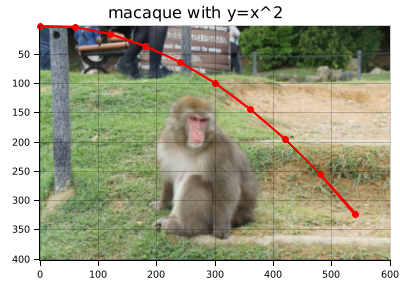

In [17]:
let (width, height) = (400, 300);
let mut canvas = RgbImage::new(width, height);

{
    let mut buf = canvas.as_flat_samples_mut();

    let root =
        BitMapBackend::<RGBPixel>::with_buffer_and_format(buf.as_mut_slice(), (width, height))?
        .into_drawing_area();
    root.fill(&WHITE)?;
    
    // 右端のtickが切れてしまうのを避けるためにマージンを作っておく
    let root = root.margin(0, 0, 0, 10);
    
    let (width, height) = img.dimensions();
    
    // floatのtickでy方向を逆にするとなぜか処理が終わらない。
    let mut chart = ChartBuilder::on(&root)
        .caption("macaque with y=x^2", ("Arial", 20).into_font())
        .x_label_area_size(40)  // x軸ラベルの表示領域を用意しておく。
        .y_label_area_size(40)  // y軸ラベルの表示領域を用意しておく。
        .build_cartesian_2d(0..width, height..0)?;
    
    // plot areaのピクセル数を取得する
    let (w, h) = chart.plotting_area().dim_in_pixel();
    let small = img.resize_exact(w, h, FilterType::Gaussian);

    // 描画 - 左上の座標を指定する。
    let elem: BitMapElement<_> = ((0, 0), small).into(); // or
    // let elem = BitMapElement::<_>::from(((0.0f32, 80.0f32), img));
    chart.draw_series(std::iter::once(elem))?;
    
    chart.draw_series(
        LineSeries::new(
            points.iter().map(|v| 
                ( (v.0 * 60.0) as u32, (v.1 * 4.0) as u32)
            ),
            RED.stroke_width(2))
    )?;
    
    chart.draw_series(points.iter().map(|v|
        Circle::new(
            ( (v.0 * 60.0) as u32, (v.1 * 4.0) as u32 ),
            3,
            RED.filled()
        )
    ));
    
    chart.configure_mesh()
        .light_line_style(&TRANSPARENT)  // minor tickを消す
        .draw()?;        // draw ticks
}
canvas